In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/o.androsova/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/o.androsova/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


цель - сделать для каждого клиента подневные фичи

In [2]:
clients = pd.read_csv('clients.csv')
clients

,client_id,first_issue_date,first_redeem_date,age,gender
0,000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,U
1,000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
2,000048b7a6,2018-12-15 13:33:11,NaN,68,F
3,000073194a,2017-05-23 12:56:14,2017-11-24 11:18:01,60,F
4,00007c7133,2017-05-22 16:17:08,2018-12-31 17:17:33,67,U
...,...,...,...,...,...
400157,fffece623e,2018-05-13 15:09:30,2018-12-27 19:06:39,67,U
400158,ffff3dfff8,2018-11-01 16:06:52,2018-12-07 17:33:47,56,F
400159,ffffaab9da,2017-08-25 18:43:24,2017-12-08 17:53:19,23,F
400160,ffffeb5619,2017-12-05 13:26:28,NaN,62,U


In [3]:
products = pd.read_csv('products.csv')
products

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,0003020d3c,c3d3a8e8c6,c2a3ea8d5e,b7cda0ec0c,6376f2a852,123.0,394a54a7c1,9eaff48661,0.400,0,0
1,0003870676,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,acd3dd483f,10486c3cf0,0.680,0,0
2,0003ceaf69,c3d3a8e8c6,f2333c90fb,419bc5b424,f6148afbc0,271.0,f597581079,764e660dda,0.500,0,0
3,000701e093,ec62ce61e3,4202626fcb,88a515c084,48cf3d488f,172.0,54a90fe769,03c2d70bad,0.112,0,0
4,0007149564,e344ab2e71,52f13dac0c,d3cfe81323,6dc544533f,105.0,63417fe1f3,f329130198,0.600,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43033,fffac3a287,e344ab2e71,52f13dac0c,0f84eb7480,420c3b3f0b,150.0,5aef526287,f546d8aa6f,0.085,0,0
43034,fffd2946cf,e344ab2e71,52f13dac0c,a1786084ca,b2960bceb8,176.0,7bf16d4aa4,3d8c5ef5f4,0.130,0,0
43035,fffd7fb409,e344ab2e71,1d2939ba1d,2721c4b3d6,32f03574dd,255.0,1267326e16,0cfa052441,0.450,0,0
43036,fffd963a2c,c3d3a8e8c6,c2a3ea8d5e,a6b0dd76e0,a7e8f1cc02,220.0,c2eec3be6f,75ea3d1182,0.300,0,0


In [4]:
purchases_raw = pd.read_csv('purchases.csv')
purchases_raw

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


In [5]:
purchases_raw[(purchases_raw['client_id'] == '000012768d') & (purchases_raw['transaction_id'] == '7e3e2e3984')]


,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
5,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,21db5dbe53,1.0,34.0,NaN
6,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,1e208d0b4c,1.0,24.0,NaN
7,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,15ccaa8685,1.0,51.0,NaN
8,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,45389bb5b0,1.0,23.0,NaN
9,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,cb4c804130,1.0,60.0,NaN


In [6]:
purchases = purchases_raw[['client_id','transaction_id','transaction_datetime','purchase_sum','store_id','product_id', 'product_quantity','trn_sum_from_iss']].copy()


# колво*стоимость позиции
purchases['product_amt_rur'] = purchases['product_quantity'] * purchases['trn_sum_from_iss']



In [7]:
purchases[(purchases['client_id'] == '000012768d') & (purchases['transaction_id'] == '7e3e2e3984')]

,client_id,transaction_id,transaction_datetime,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,product_amt_rur
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,9a80204f78,2.0,80.0,160.0
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,da89ebd374,1.0,65.0,65.0
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,24.0
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,100.0
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,a685f1916b,1.0,22.0,22.0
5,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,21db5dbe53,1.0,34.0,34.0
6,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,1e208d0b4c,1.0,24.0,24.0
7,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,15ccaa8685,1.0,51.0,51.0
8,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,45389bb5b0,1.0,23.0,23.0
9,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,cb4c804130,1.0,60.0,60.0


In [8]:
merged_df = purchases.merge(
    products[['product_id', 'segment_id', 'brand_id', 'vendor_id', 'netto', 'is_alcohol', 'is_own_trademark']],
    on='product_id',
    how='left'
)

merged_df


,client_id,transaction_id,transaction_datetime,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,product_amt_rur,segment_id,brand_id,vendor_id,netto,is_alcohol,is_own_trademark
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,9a80204f78,2.0,80.0,160.0,116.0,082560ca58,63243765ed,0.031,0,0
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,da89ebd374,1.0,65.0,65.0,14.0,cab440afaf,43acd80c1a,0.400,0,1
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,24.0,105.0,be9c719ecd,c7609af7c3,0.230,0,0
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,100.0,69.0,f82b1d6eaa,3034fb4c4a,0.150,0,0
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,a685f1916b,1.0,22.0,22.0,150.0,032202eff9,ca1ac137e8,0.080,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,164.0,308.0,554df8bb37,4c22f7a9d8,0.250,0,0
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,7427d0830d,1.0,134.0,134.0,113.0,d77dbdf2d8,c71c32c1cc,0.360,0,0
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,60.0,14.0,4c089cfed9,83d42c099e,0.415,0,0
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,48.0,1.0,d41f146e83,6d23b46e12,1.000,0,0


In [9]:
purchases[['client_id','transaction_datetime']].nunique()    

client_id                400162
transaction_datetime    4260251
dtype: int64

In [10]:
merged_df[['client_id','transaction_datetime']].nunique()

client_id                400162
transaction_datetime    4260251
dtype: int64

In [11]:
unique_combinations = merged_df[['client_id', 'transaction_datetime']].drop_duplicates()
num_unique_combinations = unique_combinations.shape[0]
print(f"Количество уникальных комбинаций: {num_unique_combinations}")


Количество уникальных комбинаций: 8045217


In [12]:
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_datetime']).dt.date


In [13]:
# сумма покупок за день
total_purchase_sum = merged_df.groupby(['client_id', 'transaction_date'])['product_amt_rur'].sum().reset_index(name='total_purchase_sum')
# нетто
total_netto = merged_df.groupby(['client_id', 'transaction_date'])['netto'].sum().reset_index(name='total_netto')

# процент покупок алкоголя
alcohol_percentage = merged_df.groupby(['client_id', 'transaction_date'])['is_alcohol'].mean().multiply(100).reset_index(name='alcohol_percentage')

# Процент товаров собственной торговой марки
own_trademark_percentage = merged_df.groupby(['client_id', 'transaction_date'])['is_own_trademark'].mean().multiply(100).reset_index(name='own_trademark_percentage')


# сегменты
unique_segments = merged_df.groupby(['client_id', 'transaction_date'])['segment_id'].nunique().reset_index(name='unique_segments')
# бренды
unique_brands = merged_df.groupby(['client_id', 'transaction_date'])['brand_id'].nunique().reset_index(name='unique_brands')


# Уникальные поставщики
unique_vendors = merged_df.groupby(['client_id', 'transaction_date'])['vendor_id'].nunique().reset_index(name='unique_vendors')

# Уникальные магазины
unique_stores = merged_df.groupby(['client_id', 'transaction_date'])['store_id'].nunique().reset_index(name='unique_stores')


In [14]:
merged_df

,client_id,transaction_id,transaction_datetime,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,product_amt_rur,segment_id,brand_id,vendor_id,netto,is_alcohol,is_own_trademark,transaction_date
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,9a80204f78,2.0,80.0,160.0,116.0,082560ca58,63243765ed,0.031,0,0,2018-12-01
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,da89ebd374,1.0,65.0,65.0,14.0,cab440afaf,43acd80c1a,0.400,0,1,2018-12-01
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,24.0,105.0,be9c719ecd,c7609af7c3,0.230,0,0,2018-12-01
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,100.0,69.0,f82b1d6eaa,3034fb4c4a,0.150,0,0,2018-12-01
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,1007.0,54a4a11a29,a685f1916b,1.0,22.0,22.0,150.0,032202eff9,ca1ac137e8,0.080,0,0,2018-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45786563,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,164.0,308.0,554df8bb37,4c22f7a9d8,0.250,0,0,2019-03-15
45786564,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,7427d0830d,1.0,134.0,134.0,113.0,d77dbdf2d8,c71c32c1cc,0.360,0,0,2019-03-15
45786565,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,60.0,14.0,4c089cfed9,83d42c099e,0.415,0,0,2019-03-15
45786566,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,48.0,1.0,d41f146e83,6d23b46e12,1.000,0,0,2019-03-15


In [15]:
# среднее по дням посмотрим



# Среднее количество товаров в день
avg_product_quantity = merged_df.groupby(['client_id', 'transaction_date'])['product_quantity'].mean().reset_index(name='avg_product_quantity')

# Общее количество товаров в день
total_products = merged_df.groupby(['client_id', 'transaction_date'])['product_quantity'].sum().reset_index(name='total_products')

# Средняя сумма продукта в день
avg_product_sum = merged_df.groupby(['client_id', 'transaction_date'])['product_amt_rur'].mean().reset_index(name='avg_product_sum')

# Максимальная сумма чека
max_purchase_sum = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].max().reset_index(name='max_purchase_sum')

# Минимальная сумма чека
min_purchase_sum = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].min().reset_index(name='min_purchase_sum')

# Количество чеков за день
transaction_count = merged_df.groupby(['client_id', 'transaction_date'])['transaction_id'].count().reset_index(name='transaction_count')


In [16]:
# среднее по чеку на клиента в день
#-----------------------------------

# среднее количество товаров в чеке
ch_avg_product_quantity_prep = merged_df.groupby(['client_id', 'transaction_date','transaction_id'])['product_quantity'].mean().reset_index(name='product_quantity')
ch_avg_product_quantity = ch_avg_product_quantity_prep.groupby(['client_id', 'transaction_date'])['product_quantity'].mean().reset_index(name='ch_avg_product_quantity')


# средняя сумма чека
ch_avg_purchase_prep = merged_df.groupby(['client_id', 'transaction_date','transaction_id'])['purchase_sum'].mean().reset_index(name='purchase_sum')
ch_avg_purchase = ch_avg_purchase_prep.groupby(['client_id', 'transaction_date'])['purchase_sum'].mean().reset_index(name='ch_avg_purchase')


# средняя стоимость товара в чеке
ch_avg_purchase_product_prep = merged_df.groupby(['client_id', 'transaction_date','transaction_id'])['product_amt_rur'].mean().reset_index(name='product_amt_rur')
ch_avg_purchase_product = ch_avg_purchase_product_prep.groupby(['client_id', 'transaction_date'])['product_amt_rur'].mean().reset_index(name='ch_avg_purchase_product')



In [17]:
# лаги
previous_sum_lag1 = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].sum().groupby(level=0).shift(1).fillna(0).reset_index(name='previous_sum_lag1')
previous_sum_lag2 = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].sum().groupby(level=0).shift(2).fillna(0).reset_index(name='previous_sum_lag2')
previous_sum_lag3 = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].sum().groupby(level=0).shift(3).fillna(0).reset_index(name='previous_sum_lag3')
previous_sum_lag7 = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].sum().groupby(level=0).shift(7).fillna(0).reset_index(name='previous_sum_lag7')
previous_sum_lag14 = merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].sum().groupby(level=0).shift(14).fillna(0).reset_index(name='previous_sum_lag14')





In [18]:
# ебнем npv и ltv

merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

discount_rate = 0.3  # Ставка дисконтирования, например 10%
merged_df['days_since_first_purchase'] = (merged_df['transaction_date'] - merged_df.groupby('client_id')['transaction_date'].transform('min')).dt.days
merged_df['discounted_purchase_sum'] = merged_df['purchase_sum'] / (1 + discount_rate) ** (merged_df['days_since_first_purchase'] / 365)

# NPV на клиента
npv_client = merged_df.groupby('client_id')['discounted_purchase_sum'].sum().reset_index(name='npv')
npv_client

,client_id,npv
0,000012768d,39696.581877
1,000036f903,56544.116875
2,000048b7a6,28960.086006
3,000073194a,59968.478948
4,00007c7133,52362.462186
...,...,...
400157,fffece623e,41978.335134
400158,ffff3dfff8,64137.609823
400159,ffffaab9da,40646.800303
400160,ffffeb5619,278059.687521


In [19]:
# npv и ltv тоже посчитаем что ли

merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

discount_rate = 0.3  

merged_df['days_since_first_purchase'] = (merged_df['transaction_date'] - merged_df.groupby('client_id')['transaction_date'].transform('min')).dt.days

merged_df['discounted_purchase_sum'] = merged_df['purchase_sum'] / (1 + discount_rate) ** (merged_df['days_since_first_purchase'] / 365)

# NPV на клиента
npv_client = merged_df.groupby('client_id')['discounted_purchase_sum'].sum().reset_index(name='npv')
#------

# Вычисление LTV
avg_revenue_per_customer = merged_df.groupby('client_id')['purchase_sum'].mean().reset_index(name='avg_revenue_per_customer')

merged_df = merged_df.merge(avg_revenue_per_customer, on='client_id', how='left')

# Общий доход за все время
merged_df['customer_lifetime'] = (merged_df['transaction_date'] - merged_df.groupby('client_id')['transaction_date'].transform('min')).dt.days
merged_df['ltv'] = merged_df['avg_revenue_per_customer'] * (merged_df['customer_lifetime'] / 365)  # LTV за год
ltv_client = merged_df.groupby('client_id')['ltv'].max().reset_index(name='ltv')


In [20]:
# покупок самых популярных категорий
most_frequent_segments = merged_df['segment_id'].value_counts()
most_frequent_segments.head(5) # возьмем сегменты 105.0  18.0    1.0      9.0      230.0



segment_id
105.0    2467678
18.0     2082526
1.0      1514630
9.0      1282236
230.0    1272881
Name: count, dtype: int64

In [21]:
merged_df['transaction_date'] = pd.to_datetime(merged_df['transaction_date'])

segment_id_105 = merged_df[merged_df['segment_id'] == 105.0].groupby(['client_id', 'transaction_date'])['purchase_sum'].count().divide(
    merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].count()).multiply(100).reset_index(name='segment_id_105_percentage').fillna(0)

segment_id_18 = merged_df[merged_df['segment_id'] == 18.0].groupby(['client_id', 'transaction_date'])['purchase_sum'].count().divide(
    merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].count()).multiply(100).reset_index(name='segment_id_18_percentage').fillna(0)

segment_id_1 = merged_df[merged_df['segment_id'] == 1.0].groupby(['client_id', 'transaction_date'])['purchase_sum'].count().divide(
    merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].count()).multiply(100).reset_index(name='segment_id_1_percentage').fillna(0)

segment_id_9 = merged_df[merged_df['segment_id'] == 9.0].groupby(['client_id', 'transaction_date'])['purchase_sum'].count().divide(
    merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].count()).multiply(100).reset_index(name='segment_id_9_percentage').fillna(0)

segment_id_230 = merged_df[merged_df['segment_id'] == 230.0].groupby(['client_id', 'transaction_date'])['purchase_sum'].count().divide(
    merged_df.groupby(['client_id', 'transaction_date'])['purchase_sum'].count()).multiply(100).reset_index(name='segment_id_230_percentage').fillna(0)



In [22]:
ch_avg_product_quantity['transaction_date'] = pd.to_datetime(ch_avg_product_quantity['transaction_date'])
ch_avg_purchase['transaction_date'] = pd.to_datetime(ch_avg_purchase['transaction_date'])
ch_avg_purchase_product['transaction_date'] = pd.to_datetime(ch_avg_purchase_product['transaction_date'])

In [23]:
total_purchase_sum['client_id'].nunique()

400162

In [24]:
client_features = total_purchase_sum
client_features['transaction_date'] = pd.to_datetime(client_features['transaction_date'])


for df in [
    # total_purchase_sum_x сумма продуктов за день
    avg_product_sum # средняя сумма продукта в день
    
    , avg_product_quantity # Среднее количество товаров в день
    , total_products # # Общее количество товаров в день
    
    , max_purchase_sum #минимальный чек в день
    , min_purchase_sum  # максимальный чек в день
    , transaction_count #количество чеков в день
    
    , ch_avg_product_quantity  # среднее количество товаров в чеке в день
    , ch_avg_purchase          # средняя сумма чека в день
    , ch_avg_purchase_product # средняя стоимость товара в чеке в день

    , unique_segments # уникальных сегментов
    , unique_brands  # уникальных брендов
    , unique_vendors # уникальных поставщиков
    , unique_stores # уникальных магазинов

    , own_trademark_percentage  # % собственного производства
    , alcohol_percentage # % алко
  
    , total_netto    #общий вес покупок
    
    
    , previous_sum_lag1  # лаг 1го дня
    , previous_sum_lag2 # лаг 2го дня
    , previous_sum_lag3 # лаг 3го дня
    
    ]:
    
    df['transaction_date'] = pd.to_datetime(df['transaction_date'])
    client_features = client_features.merge(df, on=['client_id', 'transaction_date'], how='left')


In [25]:
client_features


,client_id,transaction_date,total_purchase_sum,avg_product_sum,avg_product_quantity,total_products,max_purchase_sum,min_purchase_sum,transaction_count,ch_avg_product_quantity,...,unique_segments,unique_brands,unique_vendors,unique_stores,own_trademark_percentage,alcohol_percentage,total_netto,previous_sum_lag1,previous_sum_lag2,previous_sum_lag3
0,000012768d,2018-12-01,1137.0,59.842105,1.105263,21.0,1007.0,1007.0,19,1.105263,...,16,14,15,1,10.526316,0.000000,7.819,0.0,0.0,0.0
1,000012768d,2018-12-16,1067.0,97.000000,1.272727,14.0,574.0,574.0,11,1.272727,...,9,9,9,1,9.090909,0.000000,6.228,19133.0,0.0,0.0
2,000012768d,2019-03-08,699.0,43.687500,0.812500,13.0,803.0,803.0,16,0.812500,...,13,13,14,1,6.250000,0.000000,10.245,6314.0,19133.0,0.0
3,000012768d,2019-03-14,395.0,65.833333,1.000000,6.0,419.0,419.0,6,1.000000,...,6,6,6,1,0.000000,0.000000,3.800,12848.0,6314.0,19133.0
4,000036f903,2018-11-28,209.0,41.800000,0.800000,4.0,241.0,241.0,5,0.800000,...,5,5,4,1,40.000000,0.000000,1.820,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145657,fffff6ce77,2019-02-27,425.0,85.000000,1.000000,5.0,424.0,424.0,5,1.000000,...,5,5,4,1,40.000000,20.000000,1.765,4763.0,676.0,3030.0
7145658,fffff6ce77,2019-02-28,360.0,40.000000,1.111111,10.0,446.0,446.0,9,1.111111,...,8,7,5,1,55.555556,11.111111,4.430,2120.0,4763.0,676.0
7145659,fffff6ce77,2019-03-05,247.0,247.000000,1.000000,1.0,247.0,247.0,1,1.000000,...,1,1,1,1,0.000000,100.000000,0.250,4014.0,2120.0,4763.0
7145660,fffff6ce77,2019-03-06,355.0,118.333333,1.000000,3.0,245.0,109.0,3,1.000000,...,2,2,2,2,66.666667,66.666667,0.420,247.0,4014.0,2120.0


In [26]:

for df in [
    segment_id_18   # % категории товаров 18.0 в чеке
    ,segment_id_1   # % категории товаров 1.0 в чеке
    ,segment_id_9   # % категории товаров 9.0 в чеке
    ,segment_id_230 # % категории товаров 230.0 в чеке
    ,segment_id_105 # % категории товаров 105.0 в чеке
    ]:
    client_features = client_features.merge(df, on=['client_id', 'transaction_date'], how='left')


In [27]:
client_features#[client_features['client_id'] == '000012768d']

,client_id,transaction_date,total_purchase_sum,avg_product_sum,avg_product_quantity,total_products,max_purchase_sum,min_purchase_sum,transaction_count,ch_avg_product_quantity,...,alcohol_percentage,total_netto,previous_sum_lag1,previous_sum_lag2,previous_sum_lag3,segment_id_18_percentage,segment_id_1_percentage,segment_id_9_percentage,segment_id_230_percentage,segment_id_105_percentage
0,000012768d,2018-12-01,1137.0,59.842105,1.105263,21.0,1007.0,1007.0,19,1.105263,...,0.000000,7.819,0.0,0.0,0.0,0.000000,5.263158,0.00,0.0,10.526316
1,000012768d,2018-12-16,1067.0,97.000000,1.272727,14.0,574.0,574.0,11,1.272727,...,0.000000,6.228,19133.0,0.0,0.0,0.000000,18.181818,0.00,0.0,0.000000
2,000012768d,2019-03-08,699.0,43.687500,0.812500,13.0,803.0,803.0,16,0.812500,...,0.000000,10.245,6314.0,19133.0,0.0,0.000000,6.250000,6.25,0.0,0.000000
3,000012768d,2019-03-14,395.0,65.833333,1.000000,6.0,419.0,419.0,6,1.000000,...,0.000000,3.800,12848.0,6314.0,19133.0,0.000000,0.000000,0.00,0.0,0.000000
4,000036f903,2018-11-28,209.0,41.800000,0.800000,4.0,241.0,241.0,5,0.800000,...,0.000000,1.820,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145657,fffff6ce77,2019-02-27,425.0,85.000000,1.000000,5.0,424.0,424.0,5,1.000000,...,20.000000,1.765,4763.0,676.0,3030.0,20.000000,0.000000,0.00,0.0,0.000000
7145658,fffff6ce77,2019-02-28,360.0,40.000000,1.111111,10.0,446.0,446.0,9,1.111111,...,11.111111,4.430,2120.0,4763.0,676.0,11.111111,11.111111,0.00,0.0,0.000000
7145659,fffff6ce77,2019-03-05,247.0,247.000000,1.000000,1.0,247.0,247.0,1,1.000000,...,100.000000,0.250,4014.0,2120.0,4763.0,0.000000,0.000000,0.00,0.0,0.000000
7145660,fffff6ce77,2019-03-06,355.0,118.333333,1.000000,3.0,245.0,109.0,3,1.000000,...,66.666667,0.420,247.0,4014.0,2120.0,0.000000,0.000000,0.00,0.0,0.000000


In [28]:
client_features_fin = client_features.merge(clients[['client_id','age', 'gender']], on=['client_id'], how='left')
client_features_fin = client_features_fin.merge(npv_client, on=['client_id'], how='left')
client_features_fin = client_features_fin.merge(ltv_client, on=['client_id'], how='left')


In [29]:
client_features_fin

,client_id,transaction_date,total_purchase_sum,avg_product_sum,avg_product_quantity,total_products,max_purchase_sum,min_purchase_sum,transaction_count,ch_avg_product_quantity,...,previous_sum_lag3,segment_id_18_percentage,segment_id_1_percentage,segment_id_9_percentage,segment_id_230_percentage,segment_id_105_percentage,age,gender,npv,ltv
0,000012768d,2018-12-01,1137.0,59.842105,1.105263,21.0,1007.0,1007.0,19,1.105263,...,0.0,0.000000,5.263158,0.00,0.0,10.526316,45,U,39696.581877,221.460854
1,000012768d,2018-12-16,1067.0,97.000000,1.272727,14.0,574.0,574.0,11,1.272727,...,0.0,0.000000,18.181818,0.00,0.0,0.000000,45,U,39696.581877,221.460854
2,000012768d,2019-03-08,699.0,43.687500,0.812500,13.0,803.0,803.0,16,0.812500,...,0.0,0.000000,6.250000,6.25,0.0,0.000000,45,U,39696.581877,221.460854
3,000012768d,2019-03-14,395.0,65.833333,1.000000,6.0,419.0,419.0,6,1.000000,...,19133.0,0.000000,0.000000,0.00,0.0,0.000000,45,U,39696.581877,221.460854
4,000036f903,2018-11-28,209.0,41.800000,0.800000,4.0,241.0,241.0,5,0.800000,...,0.0,0.000000,0.000000,0.00,0.0,0.000000,72,F,56544.116875,108.327160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145657,fffff6ce77,2019-02-27,425.0,85.000000,1.000000,5.0,424.0,424.0,5,1.000000,...,3030.0,20.000000,0.000000,0.00,0.0,0.000000,42,U,170977.040540,253.208757
7145658,fffff6ce77,2019-02-28,360.0,40.000000,1.111111,10.0,446.0,446.0,9,1.111111,...,676.0,11.111111,11.111111,0.00,0.0,0.000000,42,U,170977.040540,253.208757
7145659,fffff6ce77,2019-03-05,247.0,247.000000,1.000000,1.0,247.0,247.0,1,1.000000,...,4763.0,0.000000,0.000000,0.00,0.0,0.000000,42,U,170977.040540,253.208757
7145660,fffff6ce77,2019-03-06,355.0,118.333333,1.000000,3.0,245.0,109.0,3,1.000000,...,2120.0,0.000000,0.000000,0.00,0.0,0.000000,42,U,170977.040540,253.208757


In [30]:
client_features_fin_nodupl = client_features_fin.drop_duplicates()


In [31]:

#client_features_fin.to_csv('client_features_fin.csv', index=False)  


In [32]:
client_features_fin[(client_features_fin['client_id'] == '000012768d')]


,client_id,transaction_date,total_purchase_sum,avg_product_sum,avg_product_quantity,total_products,max_purchase_sum,min_purchase_sum,transaction_count,ch_avg_product_quantity,...,previous_sum_lag3,segment_id_18_percentage,segment_id_1_percentage,segment_id_9_percentage,segment_id_230_percentage,segment_id_105_percentage,age,gender,npv,ltv
0,000012768d,2018-12-01,1137.0,59.842105,1.105263,21.0,1007.0,1007.0,19,1.105263,...,0.0,0.0,5.263158,0.00,0.0,10.526316,45,U,39696.581877,221.460854
1,000012768d,2018-12-16,1067.0,97.000000,1.272727,14.0,574.0,574.0,11,1.272727,...,0.0,0.0,18.181818,0.00,0.0,0.000000,45,U,39696.581877,221.460854
2,000012768d,2019-03-08,699.0,43.687500,0.812500,13.0,803.0,803.0,16,0.812500,...,0.0,0.0,6.250000,6.25,0.0,0.000000,45,U,39696.581877,221.460854
3,000012768d,2019-03-14,395.0,65.833333,1.000000,6.0,419.0,419.0,6,1.000000,...,19133.0,0.0,0.000000,0.00,0.0,0.000000,45,U,39696.581877,221.460854


In [33]:
#purchases[(purchases['client_id'] == '000012768d')]


In [34]:
client_features_fin.columns

Index(['client_id', 'transaction_date', 'total_purchase_sum',
       'avg_product_sum', 'avg_product_quantity', 'total_products',
       'max_purchase_sum', 'min_purchase_sum', 'transaction_count',
       'ch_avg_product_quantity', 'ch_avg_purchase', 'ch_avg_purchase_product',
       'unique_segments', 'unique_brands', 'unique_vendors', 'unique_stores',
       'own_trademark_percentage', 'alcohol_percentage', 'total_netto',
       'previous_sum_lag1', 'previous_sum_lag2', 'previous_sum_lag3',
       'segment_id_18_percentage', 'segment_id_1_percentage',
       'segment_id_9_percentage', 'segment_id_230_percentage',
       'segment_id_105_percentage', 'age', 'gender', 'npv', 'ltv'],
      dtype='object')

    , total_purchase_sum # сумма продуктов за день
    , avg_product_sum # средняя сумма продукта в день
    
    , avg_product_quantity # Среднее количество товаров в день
    , total_products # # Общее количество товаров в день
    
    , max_purchase_sum #минимальный чек в день
    , min_purchase_sum  # максимальный чек в день
    , transaction_count #количество чеков в день
    
    , ch_avg_product_quantity  # среднее количество товаров в чеке в день
    , ch_avg_purchase          # средняя сумма чека в день
    , ch_avg_purchase_product # средняя стоимость товара в чеке в день

    , unique_segments # уникальных сегментов
    , unique_brands  # уникальных брендов
    , unique_vendors # уникальных поставщиков
    , unique_stores # уникальных магазинов

    , own_trademark_percentage  # % собственного производства
    , alcohol_percentage # % алко
  
    , total_netto    #общий вес покупок

    , previous_sum_lag1  # лаг 1го дня
    , previous_sum_lag2 # лаг 2го дня
    , previous_sum_lag3 # лаг 3го дня
    , segment_id_18   # % категории товаров 18.0 в чеке (топ5 популярных)
    , segment_id_1   # % категории товаров 1.0 в чеке (топ5 популярных)
    , segment_id_9   # % категории товаров 9.0 в чеке (топ5 популярных)
    , segment_id_230 # % категории товаров 230.0 в чеке (топ5 популярных)
    , segment_id_105 # % категории товаров 105.0 в чеке (топ5 популярных)
    
    , age	 # фикс во времени: возраст
    , gender # фикс во времени: пол
    , npv	 # фикс во времени: npv на клиента
    , ltv    # фикс во времени: ltv на клиента

# Фичи для клиента за каждый день его покупок:


- **`total_purchase_sum`** — Сумма продуктов за день  
- **`avg_product_sum`** — Средняя сумма продукта в день  

- **`avg_product_quantity`** — Среднее количество товаров в день  
- **`total_products`** — Общее количество товаров в день  

- **`max_purchase_sum`** — Минимальный чек в день  
- **`min_purchase_sum`** — Максимальный чек в день  
- **`transaction_count`** — Количество чеков в день  

- **`ch_avg_product_quantity`** — Среднее количество товаров в чеке в день  
- **`ch_avg_purchase`** — Средняя сумма чека в день  
- **`ch_avg_purchase_product`** — Средняя стоимость товара в чеке в день  

- **`unique_segments`** — Уникальные сегменты  
- **`unique_brands`** — Уникальные бренды  
- **`unique_vendors`** — Уникальные поставщики  
- **`unique_stores`** — Уникальные магазины  

- **`own_trademark_percentage`** — % Собственного производства  
- **`alcohol_percentage`** — % Алкоголя  

- **`total_netto`** — Общий вес покупок  

- **`previous_sum_lag1`** — Лаг 1-го дня  
- **`previous_sum_lag2`** — Лаг 2-го дня  
- **`previous_sum_lag3`** — Лаг 3-го дня  

- **`segment_id_18`** — % категории товаров 18.0 в чеке (топ-5 популярных)  
- **`segment_id_1`** — % категории товаров 1.0 в чеке (топ-5 популярных)  
- **`segment_id_9`** — % категории товаров 9.0 в чеке (топ-5 популярных)  
- **`segment_id_230`** — % категории товаров 230.0 в чеке (топ-5 популярных)  
- **`segment_id_105`** — % категории товаров 105.0 в чеке (топ-5 популярных)  

- **`age`** — Возраст клиента  
- **`gender`** — Пол клиента  
- **`npv`** — NPV на клиента  
- **`ltv`** — LTV на клиента  


# посмотрим что получилось


In [35]:
client_features_final_before_eda = client_features_fin.copy()

In [36]:
client_features_fin.describe()

,transaction_date,total_purchase_sum,avg_product_sum,avg_product_quantity,total_products,max_purchase_sum,min_purchase_sum,transaction_count,ch_avg_product_quantity,ch_avg_purchase,...,previous_sum_lag2,previous_sum_lag3,segment_id_18_percentage,segment_id_1_percentage,segment_id_9_percentage,segment_id_230_percentage,segment_id_105_percentage,age,npv,ltv
count,7145662,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,...,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06,7.145662e+06
mean,2019-01-22 15:21:47.599378944,8.237681e+02,1.471761e+02,1.261141e+00,7.991848e+00,4.563847e+02,4.222084e+02,6.407603e+00,1.265351e+00,4.387611e+02,...,4.332715e+03,4.023854e+03,3.692325e+00,4.007005e+00,3.215898e+00,2.463709e+00,6.291571e+00,4.727415e+01,1.159413e+05,1.631765e+02
min,2018-11-21 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.491000e+03,2.854572e+00,0.000000e+00
25%,2018-12-24 00:00:00,1.740000e+02,4.750000e+01,1.000000e+00,3.000000e+00,1.589700e+02,1.370000e+02,3.000000e+00,1.000000e+00,1.525000e+02,...,2.300000e+02,1.449900e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+01,3.049995e+04,8.682517e+01
50%,2019-01-25 00:00:00,3.790000e+02,7.400000e+01,1.000000e+00,6.000000e+00,3.070000e+02,2.770000e+02,5.000000e+00,1.000000e+00,2.950000e+02,...,1.055820e+03,8.900000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.600000e+01,6.347801e+04,1.287843e+02
75%,2019-02-22 00:00:00,7.930000e+02,1.202778e+02,1.333333e+00,1.000000e+01,5.690000e+02,5.268800e+02,8.000000e+00,1.352941e+00,5.460000e+02,...,3.647000e+03,3.290000e+03,5.555556e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.666667e+00,6.000000e+01,1.290197e+05,1.966720e+02
max,2019-03-18 00:00:00,1.996998e+07,1.054470e+07,4.614250e+03,1.845700e+04,3.514904e+04,3.514904e+04,7.350000e+02,4.614250e+03,3.514904e+04,...,1.420633e+06,1.420633e+06,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.901000e+03,8.888836e+06,2.778353e+03
std,NaN,1.585271e+04,5.316721e+03,2.164631e+00,1.211913e+01,5.042122e+02,4.811734e+02,5.516952e+00,2.180747e+00,4.835078e+02,...,1.256360e+04,1.214041e+04,7.397245e+00,1.136502e+01,1.118892e+01,1.079392e+01,1.429651e+01,3.949463e+01,1.901820e+05,1.259965e+02


In [37]:
client_features_fin.info()

numerical_col = [
    'total_purchase_sum'
    ,'avg_product_sum'
    ,'avg_product_quantity'
    , 'total_products' 
    
    , 'max_purchase_sum' #минимальный чек в день
    , 'min_purchase_sum'  # максимальный чек в день
    , 'transaction_count' #количество чеков в день
    
    , 'ch_avg_product_quantity'  # среднее количество товаров в чеке в день
    , 'ch_avg_purchase'          # средняя сумма чека в день
    , 'ch_avg_purchase_product' # средняя стоимость товара в чеке в день

    , 'unique_segments' # уникальных сегментов
    , 'unique_brands'  # уникальных брендов
    , 'unique_vendors' # уникальных поставщиков
    , 'unique_stores' # уникальных магазинов

    , 'own_trademark_percentage'  # % собственного производства
    , 'alcohol_percentage' # % алко
  
    , 'total_netto'    #общий вес покупок

    , 'previous_sum_lag1'  # лаг 1го дня
    , 'previous_sum_lag2' # лаг 2го дня
    , 'previous_sum_lag3' # лаг 3го дня
    , 'segment_id_18_percentage'   # % категории товаров 18.0 в чеке (топ5 популярных)
    , 'segment_id_1_percentage'   # % категории товаров 1.0 в чеке (топ5 популярных)
    , 'segment_id_9_percentage'   # % категории товаров 9.0 в чеке (топ5 популярных)
    , 'segment_id_230_percentage' # % категории товаров 230.0 в чеке (топ5 популярных)
    , 'segment_id_105_percentage' # % категории товаров 105.0 в чеке (топ5 популярных)
    
    , 'age'	 # фикс во времени: возраст
    , 'npv'	 # фикс во времени: npv на клиента
    , 'ltv'    # фикс во времени: ltv на клиента
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145662 entries, 0 to 7145661
Data columns (total 31 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   client_id                  object        
 1   transaction_date           datetime64[ns]
 2   total_purchase_sum         float64       
 3   avg_product_sum            float64       
 4   avg_product_quantity       float64       
 5   total_products             float64       
 6   max_purchase_sum           float64       
 7   min_purchase_sum           float64       
 8   transaction_count          int64         
 9   ch_avg_product_quantity    float64       
 10  ch_avg_purchase            float64       
 11  ch_avg_purchase_product    float64       
 12  unique_segments            int64         
 13  unique_brands              int64         
 14  unique_vendors             int64         
 15  unique_stores              int64         
 16  own_trademark_percentage   float64  

In [40]:
# 7. Анализ корреляций
correlation_matrix = client_features_fin[numerical_col].corr()
print(f'Корреляции между числовыми переменными:\n{correlation_matrix}')


Корреляции между числовыми переменными:
                           total_purchase_sum  avg_product_sum  \
total_purchase_sum                   1.000000         0.627265   
avg_product_sum                      0.627265         1.000000   
avg_product_quantity                 0.161567         0.199173   
total_products                       0.175925         0.083913   
max_purchase_sum                     0.155776         0.087590   
min_purchase_sum                     0.092108         0.067850   
transaction_count                    0.046786        -0.004066   
ch_avg_product_quantity              0.205644         0.211340   
ch_avg_purchase                      0.124746         0.079358   
ch_avg_purchase_product              0.806100         0.892312   
unique_segments                      0.039778        -0.005805   
unique_brands                        0.042788        -0.004757   
unique_vendors                       0.041836        -0.005027   
unique_stores                       

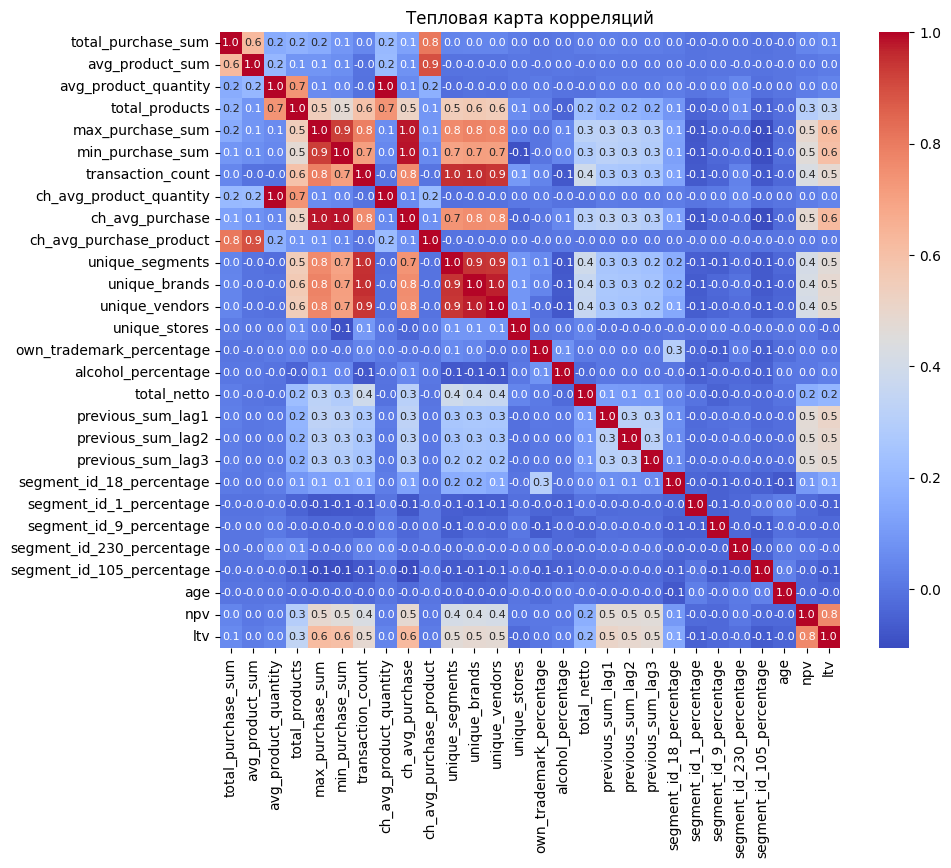

In [41]:
# Визуализация корреляции (тепловая карта)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 8})
plt.title('Тепловая карта корреляций')
plt.show()


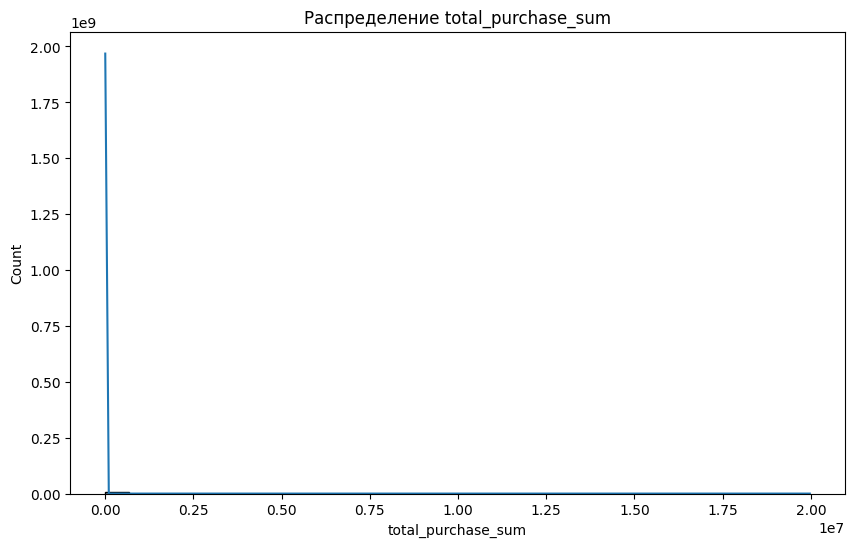

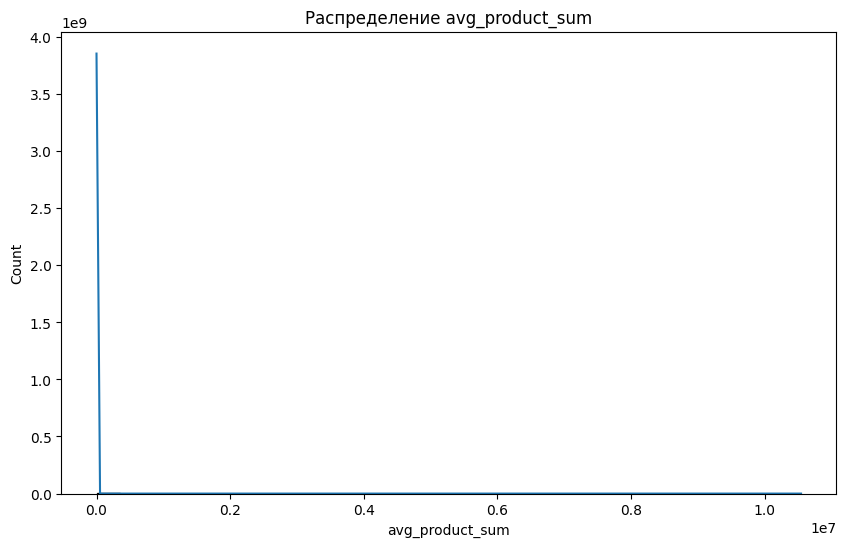

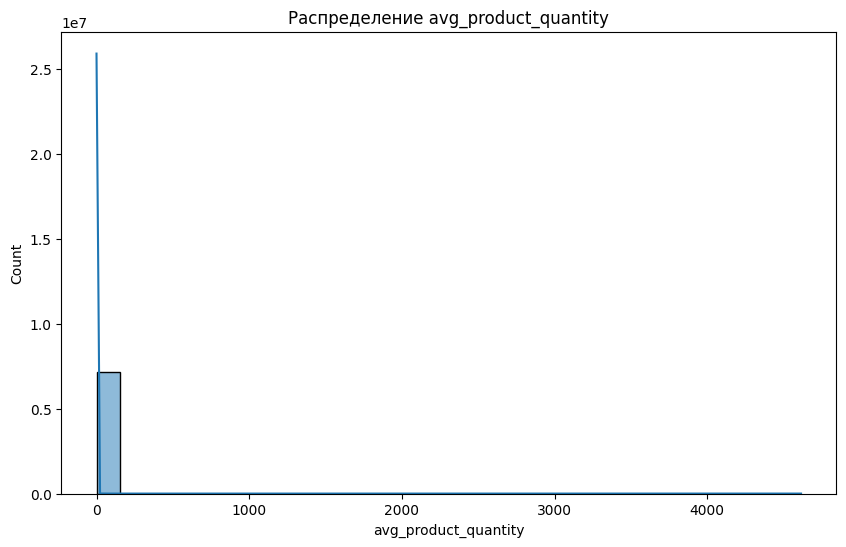

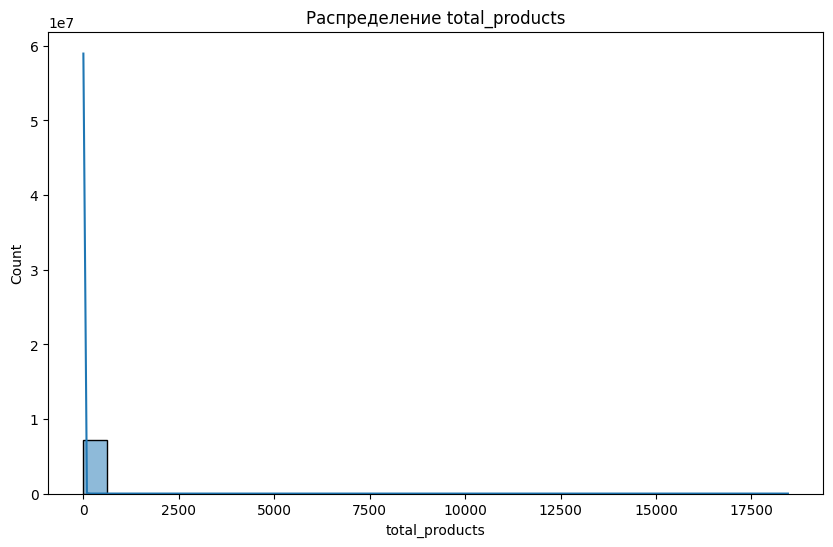

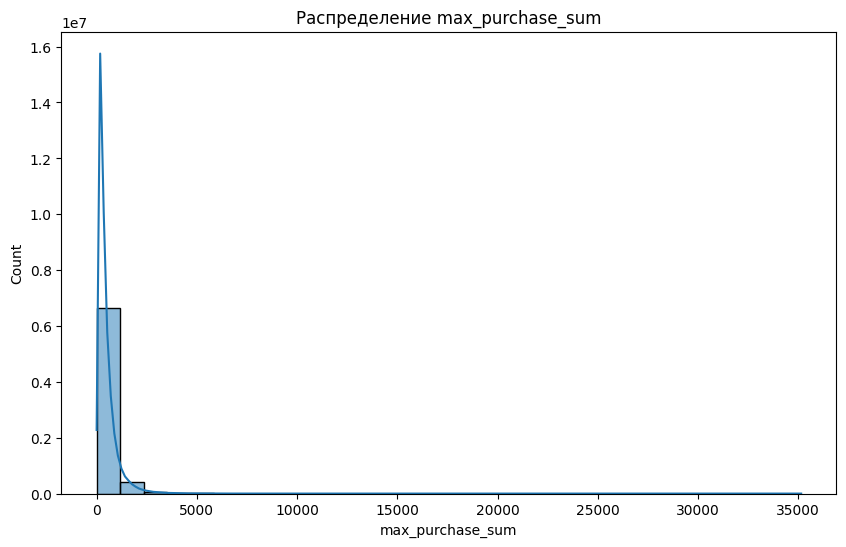

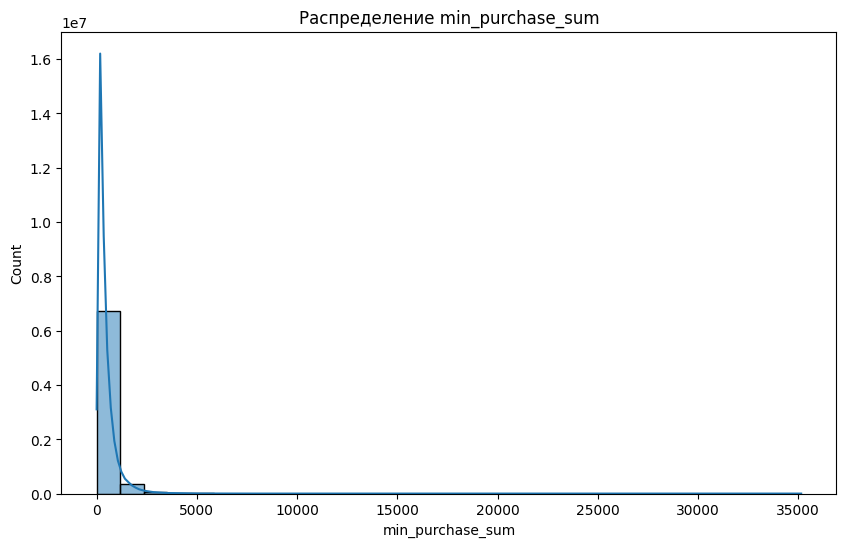

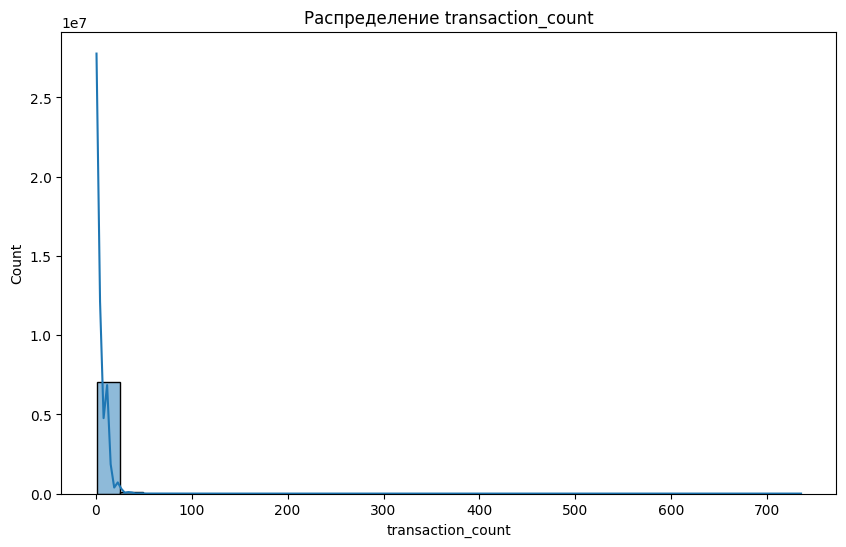

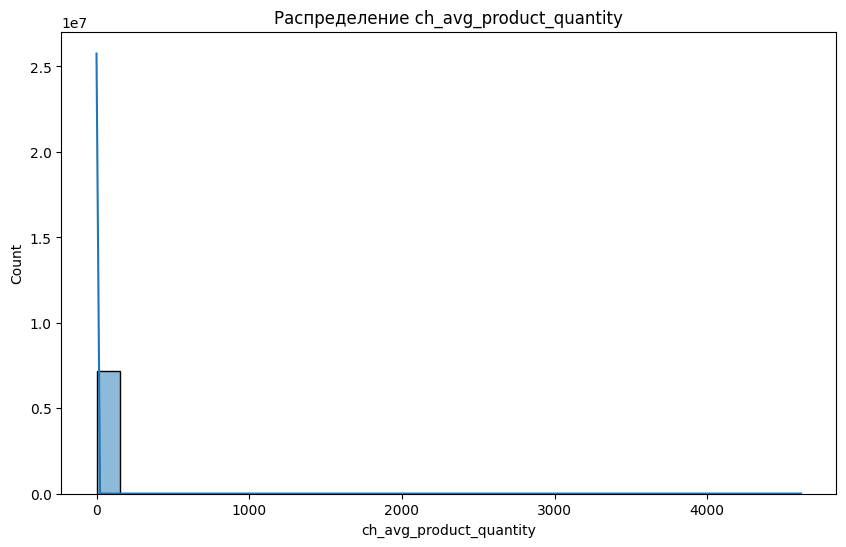

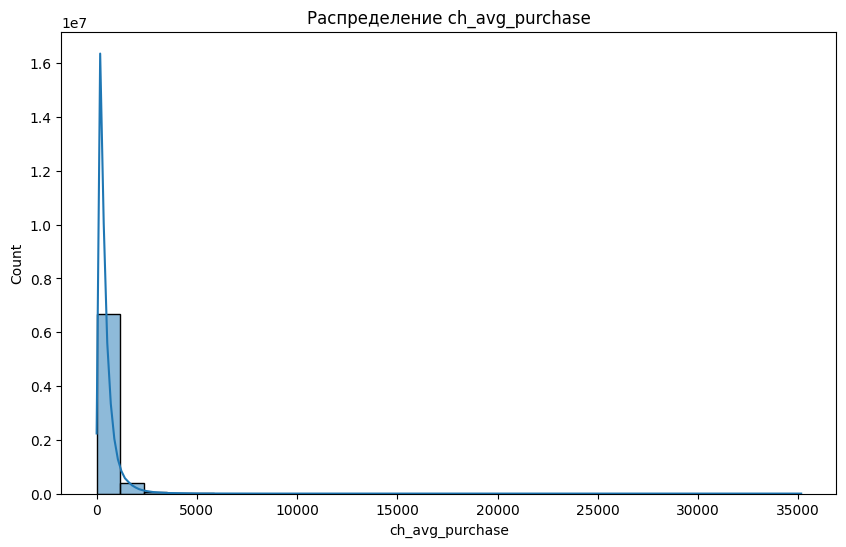

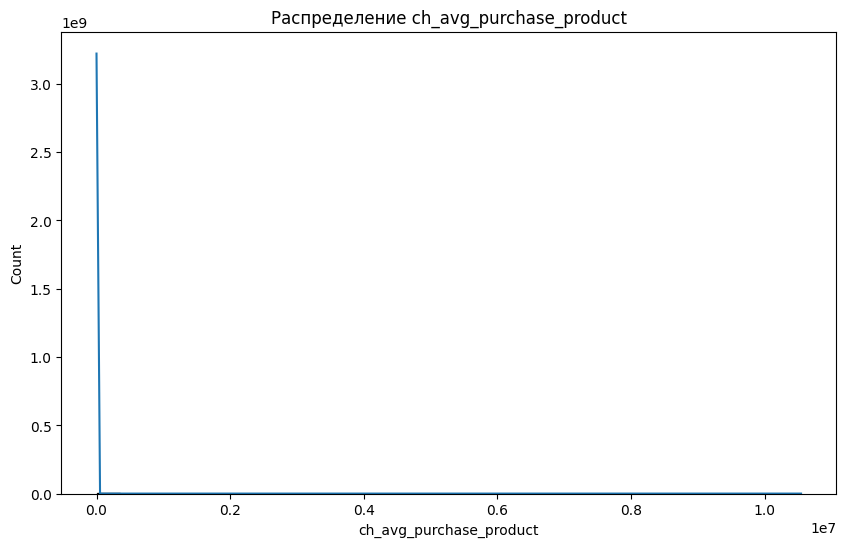

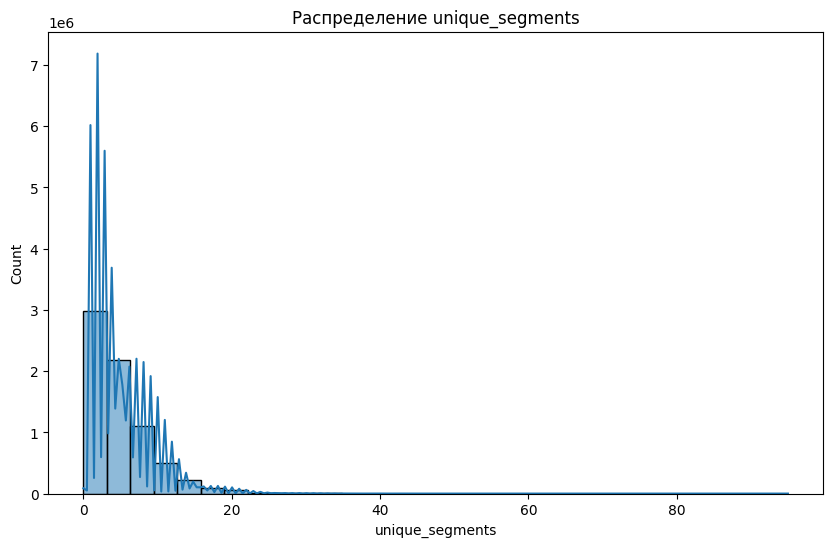

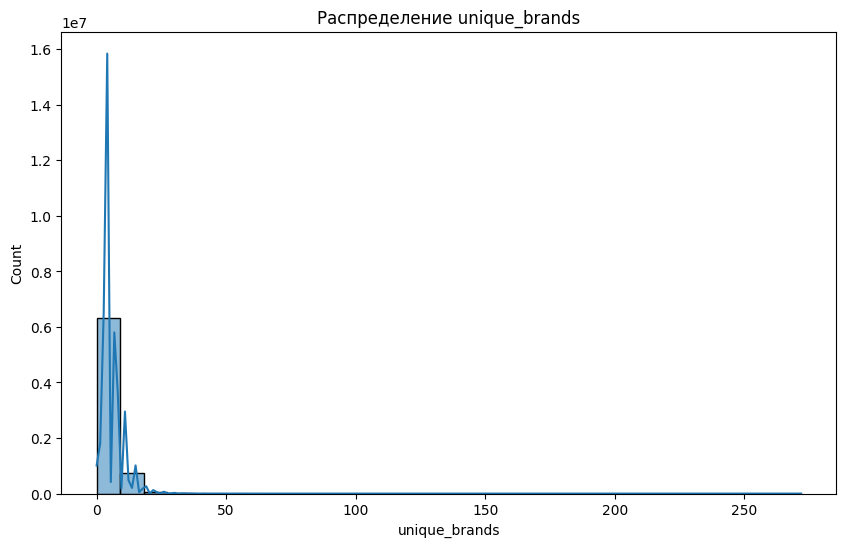

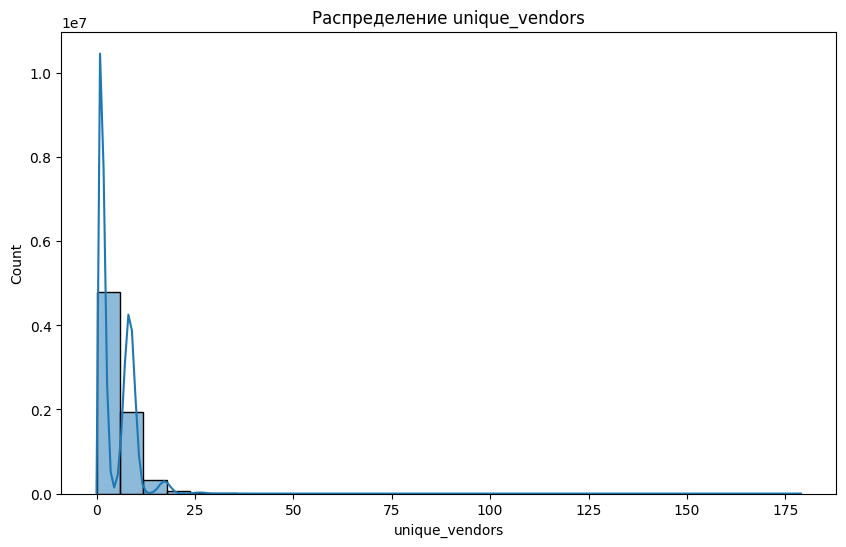

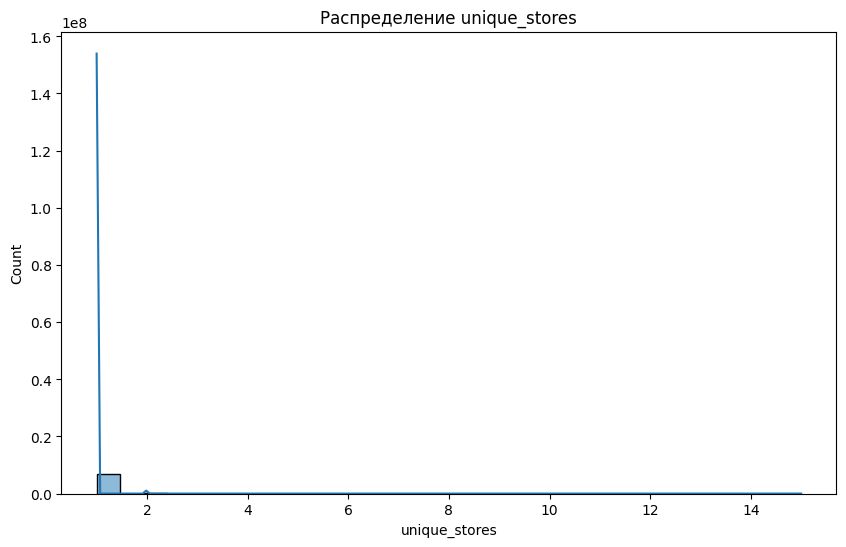

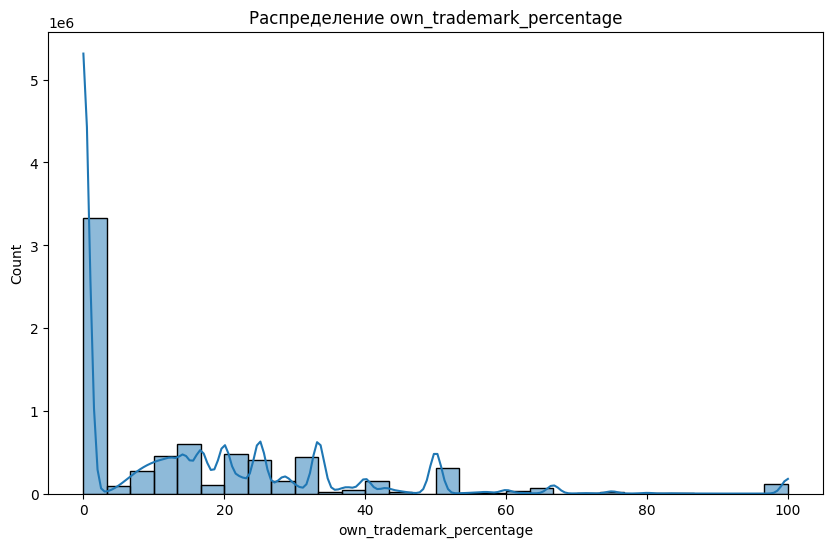

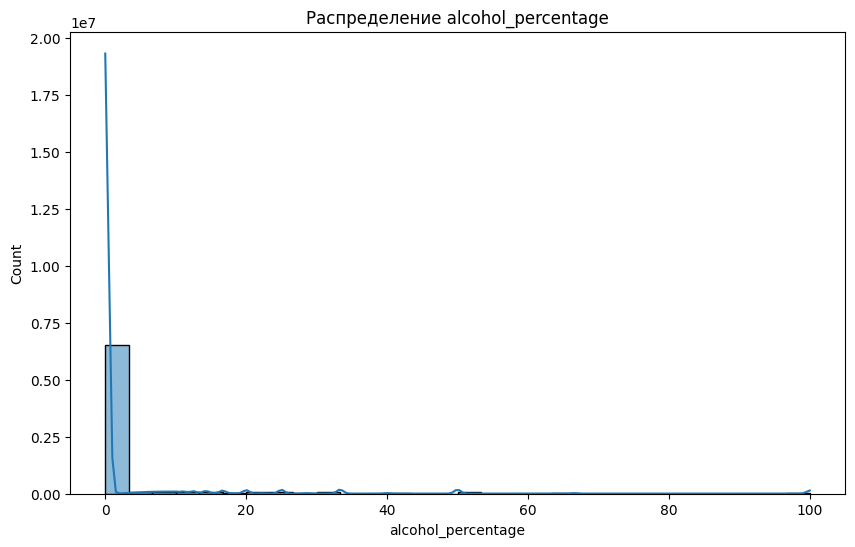

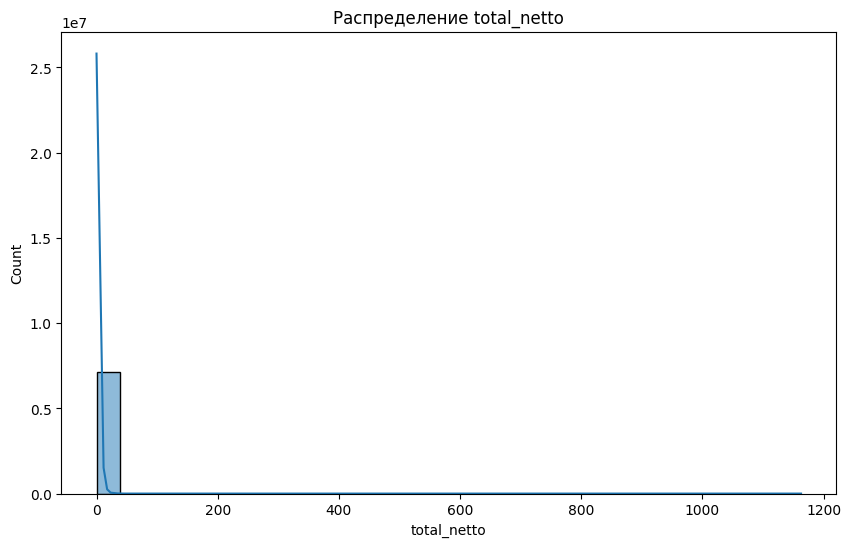

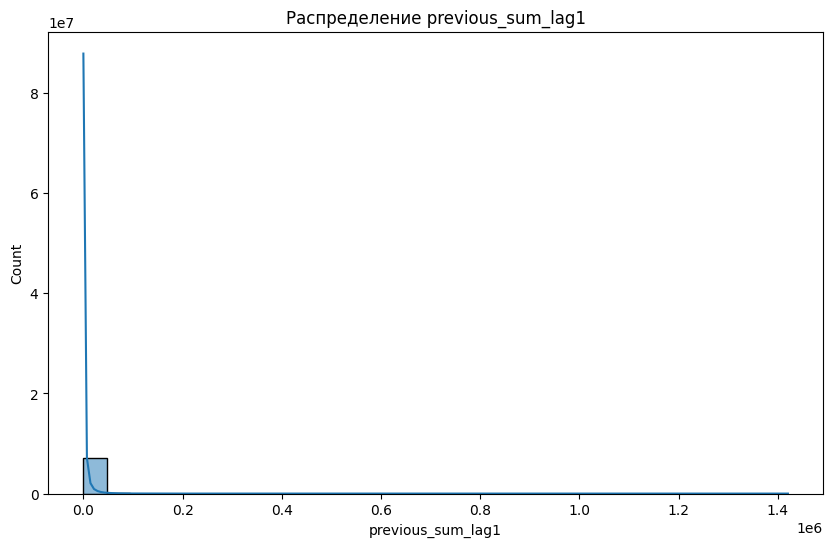

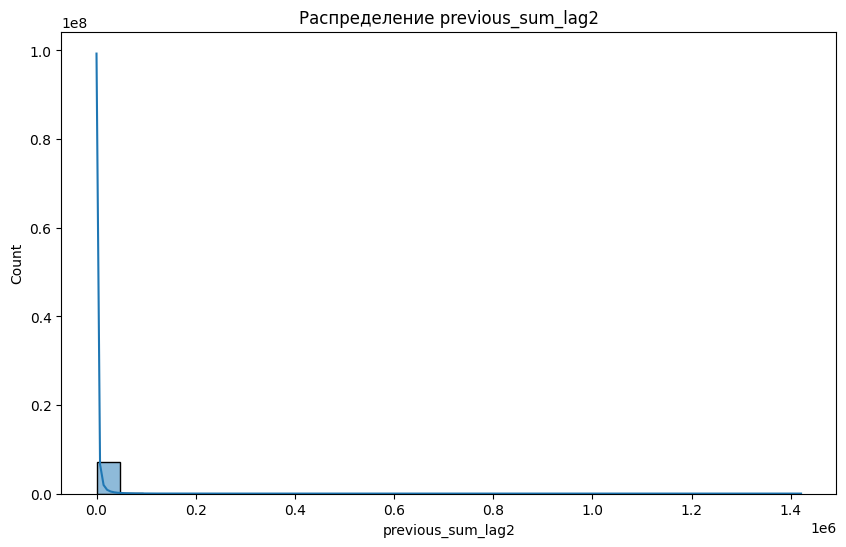

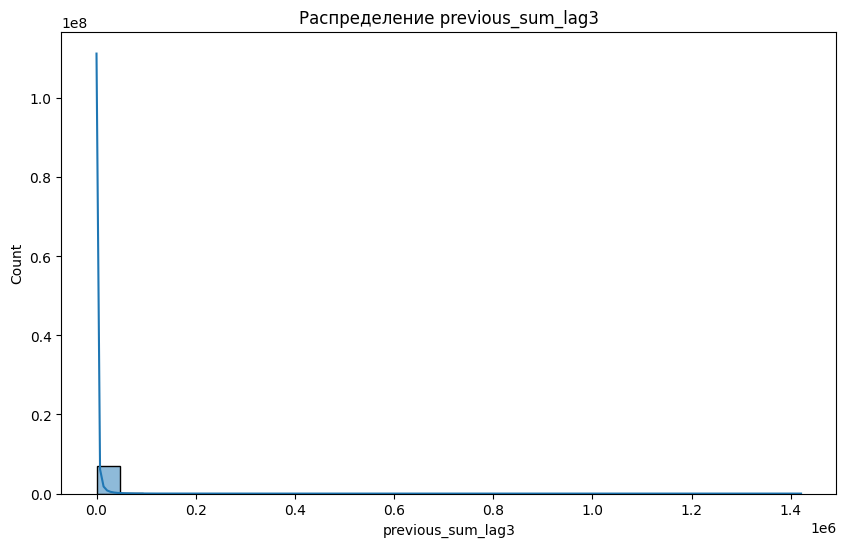

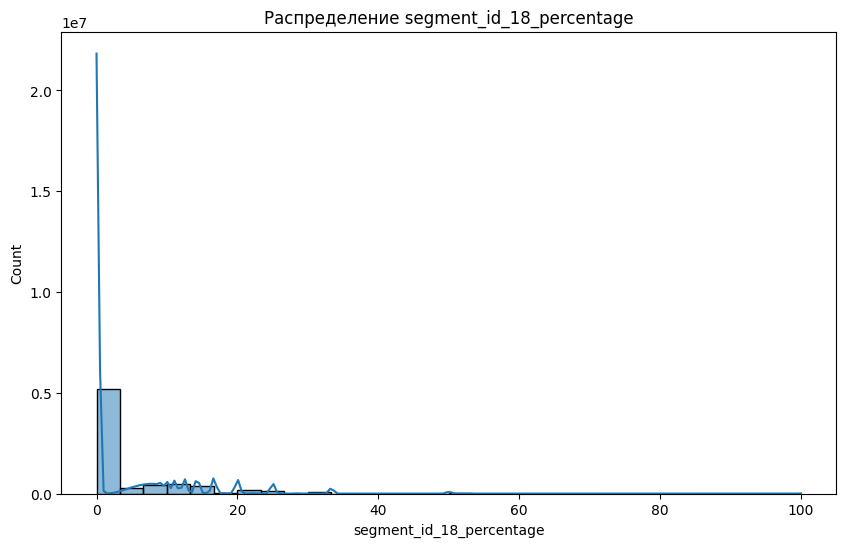

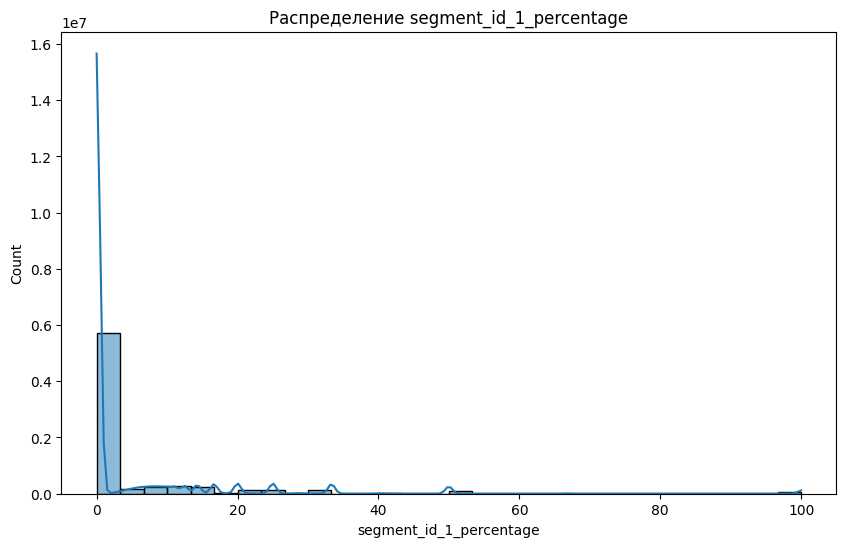

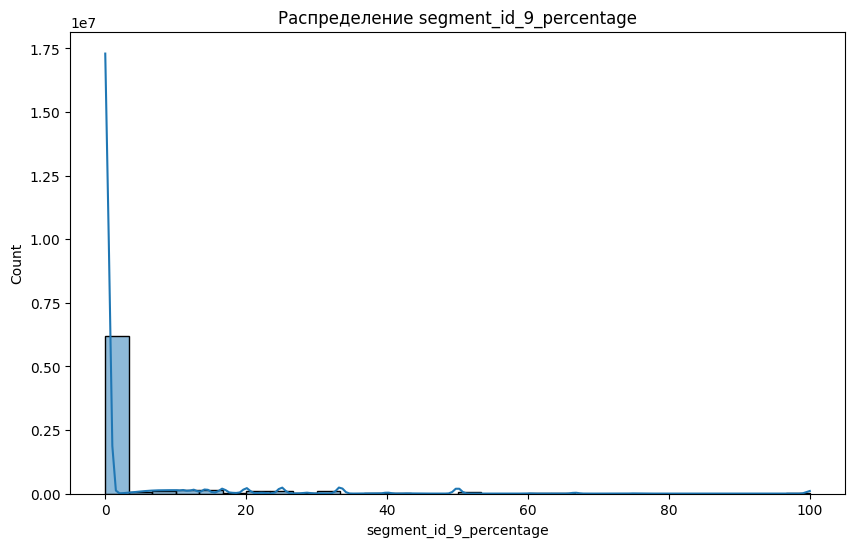

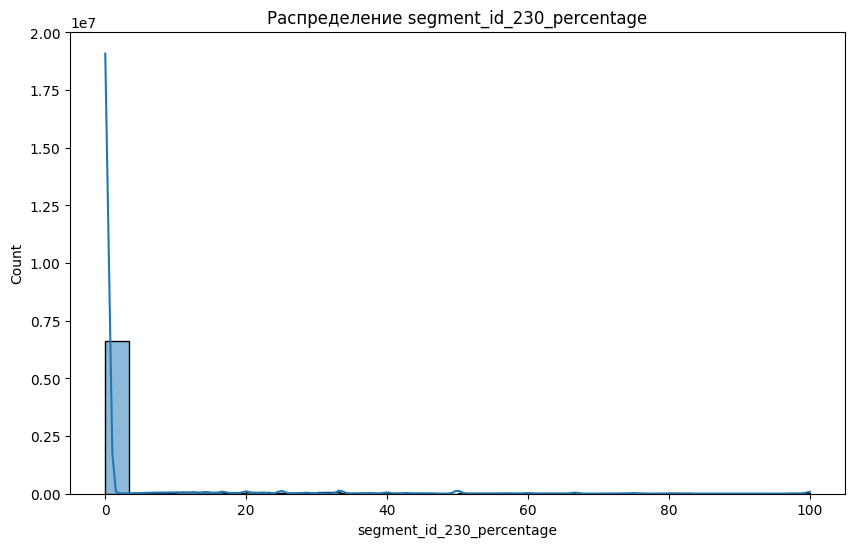

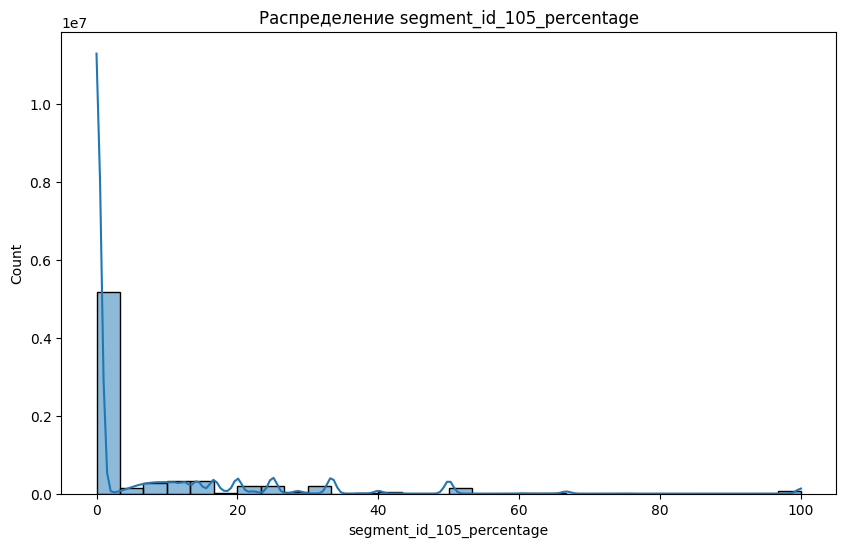

In [ ]:
# Визуализация распределения данных (гистограммы для числовых переменных)
numerical_cols = client_features_fin.select_dtypes(include=['float64', 'int64']).columns

# Строим отдельные гистограммы для каждого числового столбца
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(client_features_fin[col], kde=True, bins=30)
    plt.title(f'Распределение {col}')
    plt.show()


In [ ]:
# Боксплоты для числовых переменных
for col in client_features_fin.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=client_features_fin[col])
    plt.title(f'Боксплот для {col}')
    plt.show()
